In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [38]:
sp_index = pd.read_csv("sp500_index.csv")
sp_index

,Date,S&P500
0,2014-02-18,1840.76
1,2014-02-19,1828.75
2,2014-02-20,1839.78
3,2014-02-21,1836.25
4,2014-02-24,1847.61
...,...,...
2511,2024-02-08,4997.91
2512,2024-02-09,5026.61
2513,2024-02-12,5021.84
2514,2024-02-13,4953.17


In [39]:
sp_stocks = pd.read_excel("sp500_stocks_4years.xlsx")
sp_stocks.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,MMM,166.588959,180.000000,180.009995,177.139999,177.679993,3601700.0
1,2020-01-03,MMM,165.154465,178.449997,178.660004,175.630005,177.020004,2466900.0
2,2020-01-06,MMM,165.311783,178.619995,178.710007,176.350006,177.149994,1998000.0
3,2020-01-07,MMM,164.645416,177.899994,178.509995,176.820007,178.279999,2173000.0
4,2020-01-08,MMM,167.172028,180.630005,181.500000,177.649994,178.000000,2758300.0


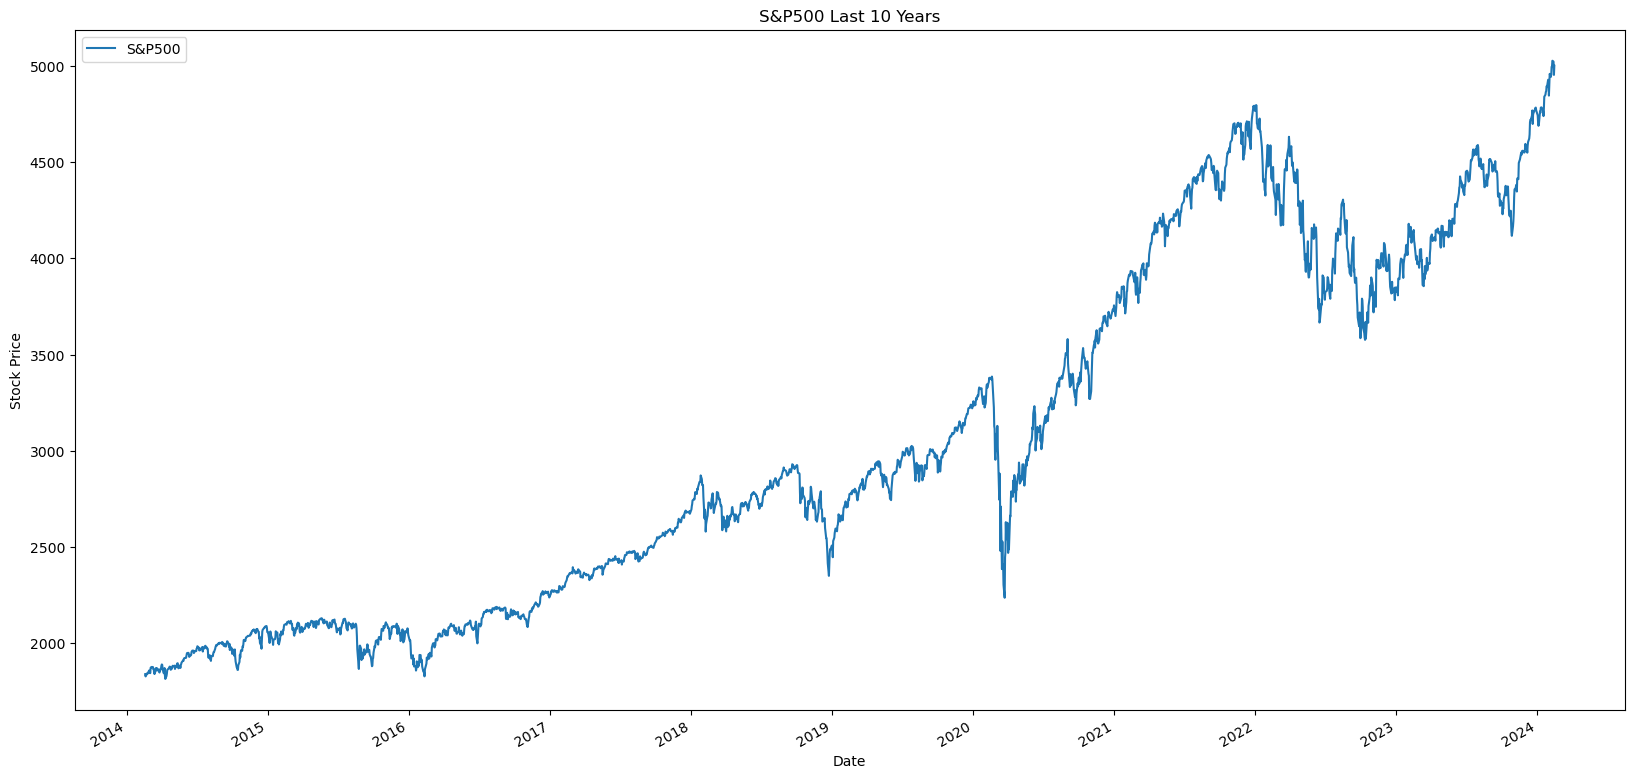

In [40]:
sp_index['Date'] = pd.to_datetime(sp_index.Date,format="%Y-%m-%d")
sp_index.index=sp_index['Date']

# Plot the data
sp_index.plot(x='Date', y='S&P500', kind='line', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('S&P500 Last 10 Years')

# Show the plot
plt.show()

In [42]:
apple_df = sp_stocks[sp_stocks['Symbol'] == 'AAPL']
apple_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
40482,2020-01-02,AAPL,73.059410,75.087502,75.150002,73.797501,74.059998,135480400.0
40483,2020-01-03,AAPL,72.349152,74.357498,75.144997,74.125000,74.287498,146322800.0
40484,2020-01-06,AAPL,72.925644,74.949997,74.989998,73.187500,73.447502,118387200.0
40485,2020-01-07,AAPL,72.582657,74.597504,75.224998,74.370003,74.959999,108872000.0
40486,2020-01-08,AAPL,73.750252,75.797501,76.110001,74.290001,74.290001,132079200.0
...,...,...,...,...,...,...,...,...
41515,2024-02-09,AAPL,188.850006,188.850006,189.990005,188.000000,188.649994,45155200.0
41516,2024-02-12,AAPL,187.149994,187.149994,188.669998,186.789993,188.419998,41781900.0
41517,2024-02-13,AAPL,185.039993,185.039993,186.210007,183.509995,185.770004,56529500.0
41518,2024-02-14,AAPL,184.149994,184.149994,185.529999,182.440002,185.320007,54630500.0


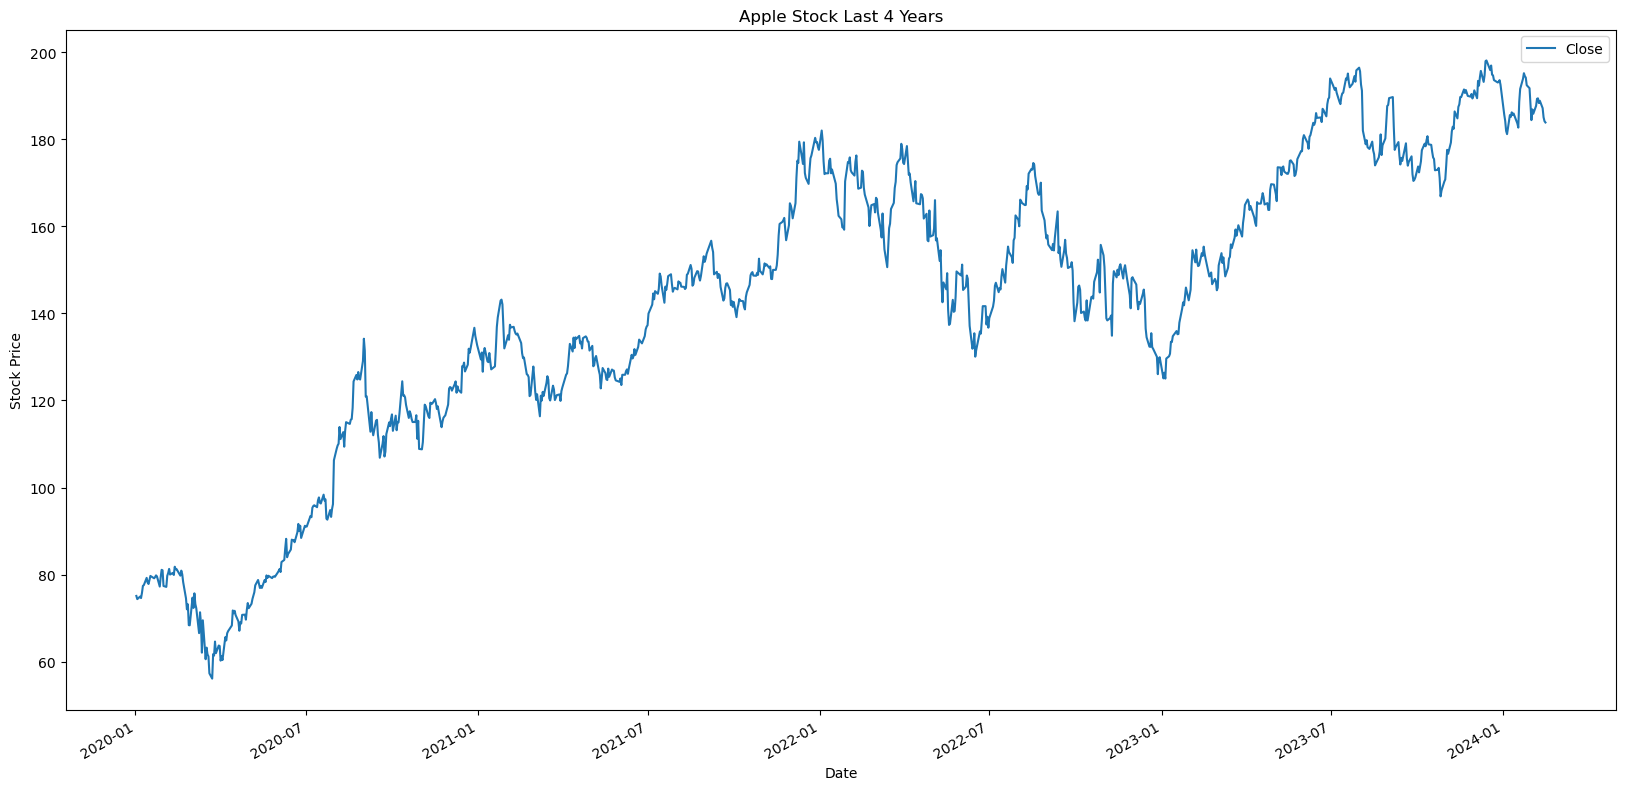

In [43]:
apple_df.plot(x='Date', y='Close', kind='line', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Last 4 Years')

# Show the plot
plt.show()

In [73]:
data=sp_index.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(sp_index)),columns=['Date','S&P500'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["S&P500"][i]=data["S&P500"][i]

In [74]:
new_dataset

,Date,S&P500
0,2014-02-18 00:00:00,1840.76
1,2014-02-19 00:00:00,1828.75
2,2014-02-20 00:00:00,1839.78
3,2014-02-21 00:00:00,1836.25
4,2014-02-24 00:00:00,1847.61
...,...,...
2511,2024-02-08 00:00:00,4997.91
2512,2024-02-09 00:00:00,5026.61
2513,2024-02-12 00:00:00,5021.84
2514,2024-02-13 00:00:00,4953.17


In [75]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:2516,:]
valid_data=final_dataset[2516:,:]

#new_dataset.index=new_dataset.Date
# Convert the "Date" column to string
new_dataset['Date'] = new_dataset['Date'].astype(str)

# Extract only the date part
new_dataset['Date'] = new_dataset['Date'].str.split(' ').str[0]

new_dataset.drop("Date",axis=1,inplace=True)
final_dataset = new_dataset.values

scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [76]:
final_dataset

array([[1840.76],
       [1828.75],
       [1839.78],
       ...,
       [5021.84],
       [4953.17],
       [5000.62]], dtype=object)

In [90]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

2456/2456 - 24s - loss: 0.0016 - 24s/epoch - 10ms/step


In [93]:
inputs_data

array([[0.8403604 ],
       [0.85074994],
       [0.84788783],
       [0.85362762],
       [0.85447473],
       [0.85169982],
       [0.85308883],
       [0.85174654],
       [0.85710949],
       [0.86546535],
       [0.85772613],
       [0.8569164 ],
       [0.85136036],
       [0.86264996],
       [0.86849875],
       [0.87412642],
       [0.88074757],
       [0.90048958],
       [0.90437009],
       [0.90425797],
       [0.91091338],
       [0.91957445],
       [0.89776762],
       [0.91284118],
       [0.9152953 ],
       [0.92156142],
       [0.92368854],
       [0.92423978],
       [0.92002915],
       [0.91162035],
       [0.8997795 ],
       [0.89475602],
       [0.89742192],
       [0.91807021],
       [0.91587769],
       [0.92427093],
       [0.92327121],
       [0.92438927],
       [0.91883012],
       [0.91049294],
       [0.92348922],
       [0.94182353],
       [0.94513099],
       [0.94954406],
       [0.95077423],
       [0.95875014],
       [0.95775666],
       [0.969

In [92]:
if inputs_data.shape[0] < 60:
    print("Not enough data points for prediction")
else:
    X_test = []
    for i in range(60, inputs_data.shape[0]):
        X_test.append(inputs_data[i-60:i, 0])

    X_test = np.array(X_test)

    print(X_test.shape)  # Check the shape before reshaping

    # Reshape X_test
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

(0,)


IndexError: tuple index out of range

In [80]:
train_data=new_dataset[:2516]
valid_data=new_dataset[2516:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series